# Notebook for Alura data-analysis and visualization course

## 1. Data Science: data and visualization

In [1]:
msg="Hello world"
print(msg)

Hello world


In [3]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [6]:
import os

print(os.getcwd())

c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization


### Open straight from zip

OBS: functionality below to open csv from zip file isn't from course 

In [5]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('./data/ml-latest-small.zip') 
df = pd.read_csv(zf.open('ml-latest-small/ratings.csv'))
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Returning to course from here:

In [6]:
notas = df
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
type(notas)


pandas.core.frame.DataFrame

In [6]:
pd.__version__

'1.4.2'

In [7]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
type(notas['nota'])

pandas.core.series.Series

In [10]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [12]:
notas['nota'].mean()

3.501556983616962

In [15]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:>

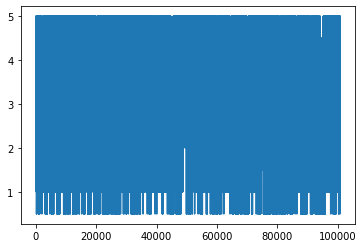

In [19]:
notas.nota.plot()

<AxesSubplot:ylabel='Frequency'>

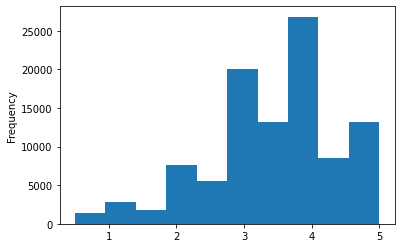

In [20]:
notas.nota.plot(kind='hist')

In [21]:
print("Média",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [22]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

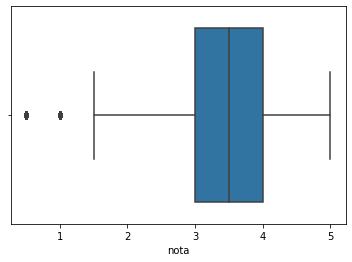

In [25]:
import seaborn as sns

sns.boxplot(x=notas.nota)

## 2. Exploratory analysis

In [1]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('./data/ml-latest-small.zip') 
df = pd.read_csv(zf.open('ml-latest-small/movies.csv'))
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes = df
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [11]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [12]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [13]:
notas.groupby("filmeId")

In [14]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [17]:
notas.groupby("filmeId").mean()['nota']

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [10]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

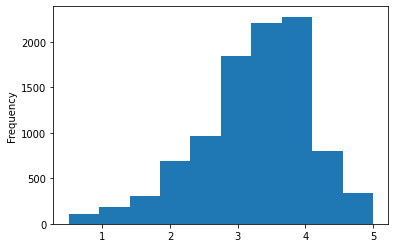

In [11]:
medias_por_filme.plot(kind="hist")

<AxesSubplot:xlabel='nota'>

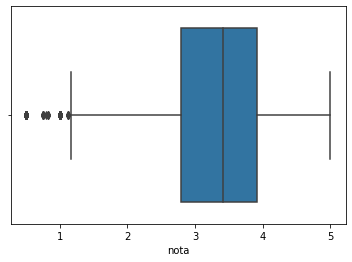

In [12]:
import seaborn as sns

sns.boxplot(x=medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

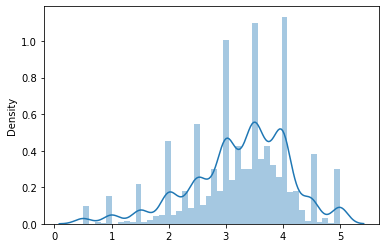

In [25]:
sns.distplot(x=medias_por_filme)

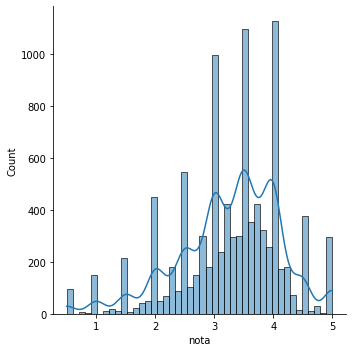

In [32]:
sns.displot(x=medias_por_filme, kde=True)

c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

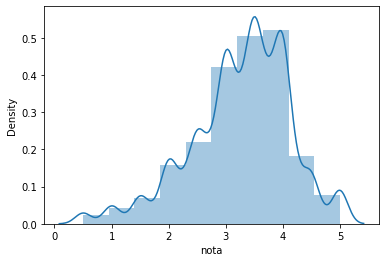

In [26]:
sns.distplot(medias_por_filme, bins=10)

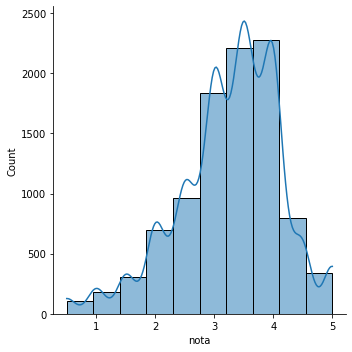

In [31]:
sns.displot(x=medias_por_filme, bins=10, kde=True)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

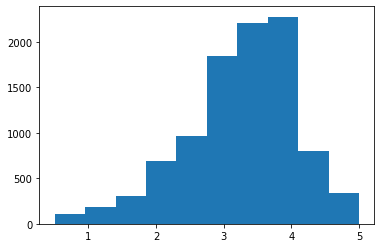

In [33]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

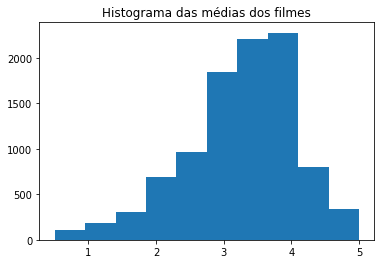

In [34]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

<AxesSubplot:ylabel='nota'>

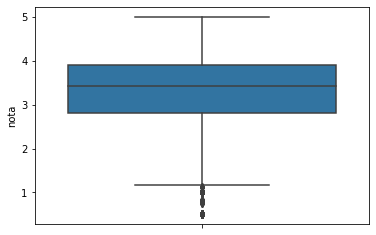

In [35]:
sns.boxplot(y=medias_por_filme)

<AxesSubplot:ylabel='nota'>

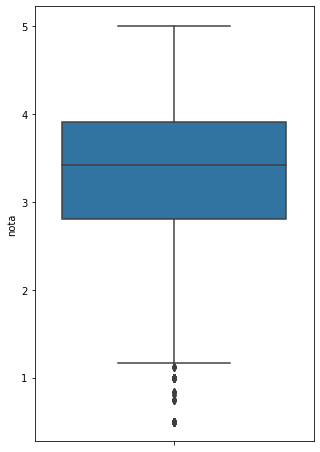

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

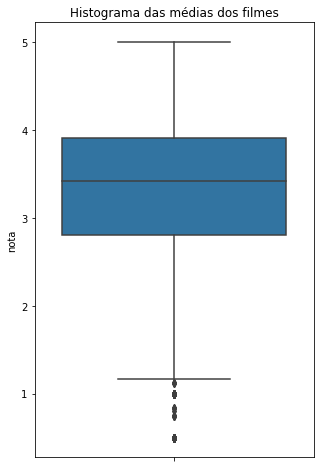

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

plt.title("Histograma das médias dos filmes")

## 3. Variables

I've used two ways of get the class' file online, both of them outside of class scope.

First, downloading the file using curl (straight to use in a Windows environment):
- `!curl -O --output-dir ./data https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula2.1/movies.csv`

Then I had found that from pandas 0.19.2 to date you can `read_csv` from url directly (and this is the way I'm using it here):
- `tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv")`

In [20]:
import pandas as pd

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv")
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [21]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Types of variable

**Categorical**:
- Nominal (as tmdb.original_language)
- Ordinal 
  - **off-course:** movie rating (like 0 to 10) would be an example of categorical ordinal variable, but movie rating *average* (like tmdb.vote_average) is **not** 
    - or, at least, it's a controversial topic, as well presented in this link: https://measuringu.com/mean-ordinal/

**Numeric (or quantitative)**
- Continuous (as tmdb.budget)
- Discrete (as tmdb.vote_count or tmdb.vote_average, as discussed above)

## 4. 